In [15]:
# from sk learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("Social_Network_Ads.csv")

# Extract features (X) and target variable (y)
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

# dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression with Raw Data
logreg_raw = LogisticRegression()
logreg_raw.fit(X_train, y_train)
y_pred_raw = logreg_raw.predict(X_test)

# Logistic Regression with Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

logreg_norm = LogisticRegression()
logreg_norm.fit(X_train_norm, y_train)
y_pred_norm = logreg_norm.predict(X_test_norm)

# Logistic Regression with Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

logreg_std = LogisticRegression()
logreg_std.fit(X_train_std, y_train)
y_pred_std = logreg_std.predict(X_test_std)

# Evaluate and compare results
def evaluate_model(y_true, y_pred, scaler_name):
    acc = accuracy_score(y_true, y_pred)
    conf_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"Results for {scaler_name}:\n")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(conf_mat)
    print("Classification Report:")
    print(class_report)
    print("\n")

evaluate_model(y_test, y_pred_raw, "Raw Data")
evaluate_model(y_test, y_pred_norm, "Normalization")
evaluate_model(y_test, y_pred_std, "Standardization")


Results for Raw Data:

Accuracy: 0.61
Confusion Matrix:
[[73  0]
 [47  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        73
           1       0.00      0.00      0.00        47

    accuracy                           0.61       120
   macro avg       0.30      0.50      0.38       120
weighted avg       0.37      0.61      0.46       120



Results for Normalization:

Accuracy: 0.84
Confusion Matrix:
[[72  1]
 [18 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88        73
           1       0.97      0.62      0.75        47

    accuracy                           0.84       120
   macro avg       0.88      0.80      0.82       120
weighted avg       0.87      0.84      0.83       120



Results for Standardization:

Accuracy: 0.85
Confusion Matrix:
[[71  2]
 [16 31]]
Classification Report:
              precision    recall  f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


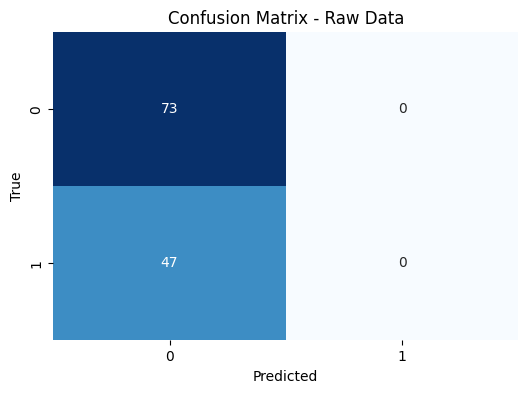

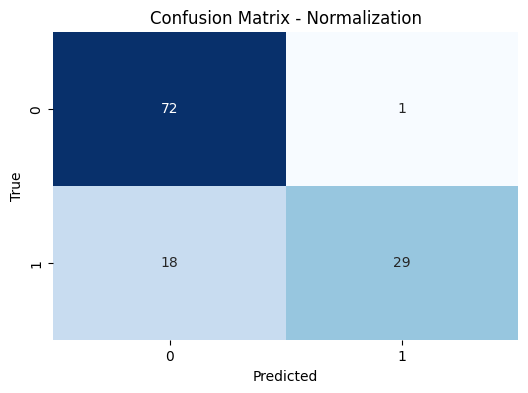

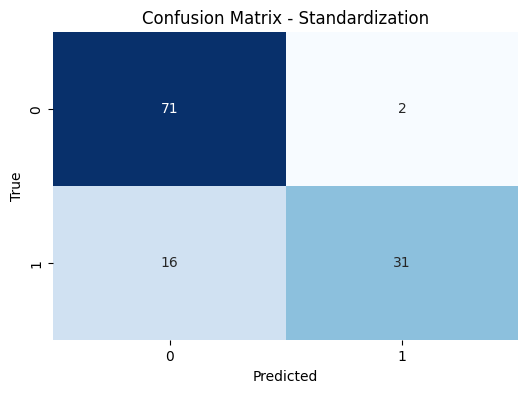

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_mat, scaler_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {scaler_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each case
conf_mat_raw = confusion_matrix(y_test, y_pred_raw)
conf_mat_norm = confusion_matrix(y_test, y_pred_norm)
conf_mat_std = confusion_matrix(y_test, y_pred_std)

plot_confusion_matrix(conf_mat_raw, "Raw Data")
plot_confusion_matrix(conf_mat_norm, "Normalization")
plot_confusion_matrix(conf_mat_std, "Standardization")


In [18]:
# from scratch

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
data = pd.read_csv("Social_Network_Ads.csv")

# Extract features and target variable
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression from scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # Add a column of ones for the bias term
    theta = np.zeros((n + 1, 1))

    for _ in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

    return theta

def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    predictions = sigmoid(np.dot(X, theta))
    return np.round(predictions)

# Raw Data
theta_raw = gradient_descent(X_train, y_train.reshape(-1, 1), learning_rate=0.01, iterations=10000)
y_pred_raw = predict(X_test, theta_raw)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
theta_normalized = gradient_descent(X_train_normalized, y_train.reshape(-1, 1), learning_rate=0.01, iterations=10000)
y_pred_normalized = predict(X_test_normalized, theta_normalized)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)

# Standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
theta_standardized = gradient_descent(X_train_standardized, y_train.reshape(-1, 1), learning_rate=0.01, iterations=10000)
y_pred_standardized = predict(X_test_standardized, theta_standardized)
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)

# Compare results
print(f"Accuracy (Raw Data): {accuracy_raw}")
print(f"Accuracy (Normalization): {accuracy_normalized}")
print(f"Accuracy (Standardization): {accuracy_standardized}")


<ipython-input-18-94df2d8489bf>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy (Raw Data): 0.6083333333333333
Accuracy (Normalization): 0.8083333333333333
Accuracy (Standardization): 0.85
